In [50]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import wikipedia
from tqdm import tqdm
# req: lxml

In [61]:
def get_wiki(x,html=False):
    'get a wikipedia page from the title of an html snippet'
    if html:
        return wikipedia.WikipediaPage(x.get('title'))
    else:
        return wikipedia.page(x.get('title'))

In [79]:
def get_table(url_link):
    content = requests.get(url_link).text
    soup = BeautifulSoup(content,'html.parser')
    table = soup.find_all('table', 'wikitable')

    df= pd.read_html(str(table))
    df=pd.DataFrame(df[0])
    return df, soup


df,soup = get_table(url_link="https://en.wikipedia.org/wiki/Indigenous_languages_of_the_Americas")
df = df.drop('Source',axis=1)
data = df.rename(columns={'Number of speakers':'Number'})
data = data.rename(columns={'Area(s) Language is spoken':'Areas'})

C:\Users\druid\AppData\Local\Temp\ipykernel_19404\1754983648.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df= pd.read_html(str(table))


In [80]:
data

,Language,Number,Official Recognition,Areas
0,Guaraní,6500000,Paraguay (Official Language) Bolivia Corriente...,"Paraguay, Bolivia, Argentina, Brazil"
1,Southern Quechua,"5,000,000 (outdated figure)[when?]",Bolivia (Official Language) Peru (Official Lan...,"Bolivia, Peru, Argentina, Chile"
2,Nahuatl,1700000,Mexico,Mexico
3,Aymara,1700000,Bolivia (Official Language) Peru (Official Lan...,"Bolivia, Peru, Chile"
4,Qʼeqchiʼ,1100000,Guatemala Belize Mexico,"Guatemala, Belize, Mexico"
...,...,...,...,...
237,Taíno languages,0,NaN,Formerly all of the Caribbean
238,Cochimí,0,"Mexico (Extinct, but retains recognition)",NaN
239,Kallawaya,0,"Bolivia (Extinct, but retains recognition)",NaN
240,Eyak,0,"Alaska, United States (Extinct, but retains re...",NaN


In [81]:
def fixxr(x):
    x = x.split(' ',1)[0]
    x = x.replace(',','')
    return x

data.Number=data.Number.apply(fixxr)
#Remove abnormalities (beta)
for num in data.Number:
    test = any(ele not in ['1','2','3','4','5','6','7','8','9','0'] for ele in list(num))
    if test == True:
        print(list(data.Number).index(num))
# For now, manually rename
data.Number[91] = '10500'

data = data[data.Number != '0']

#turn into in
data.Number = data.Number.astype(int)

#take average of number

91


C:\Users\druid\AppData\Local\Temp\ipykernel_19404\2138414885.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.Number[91] = '10500'
C:\Users\druid\AppData\Local\Temp\ipykernel_19404\2138414885.py:18: SettingWithCopyWarning: 
A value 

In [ ]:
# Maybe the best thing to do is to take the get the 
# countries raw first, and only keep the key wards. After that
# we can create a list of lists.

In [83]:
data['Areas'] = [data['Areas'][i].split(', ') for i in range(len(data['Areas']))]
# data['Areas'] = [data['Areas'][i].split(' & ') for i in range(len(data['Areas']))]
data['Areas'][5] = ['Guatamala','Mexico']
# data = data[data.Number >= 10000]
# countries = ['Argentina','Bolivia','Brazil','Canada','Chile','Colombia','Costa Rica',
#             'Ecuador','El Salvador','French Guiana','Guatemala','Honduras',
#             'Mexico','Nicaragua','Panama','Paraguay','Peru','Suriname',
#             'United States','Uruguay','Venezuela']
# for i in tqdm(range(len(data.Areas))):
#     for j in tqdm(range(len(data.Areas[i]))):
#         if any(data.Areas[i]) not in countries:
#             data.Areas[i][j].remove(data.Areas[i][j])

C:\Users\druid\AppData\Local\Temp\ipykernel_19404\189347970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Areas'] = [data['Areas'][i].split(', ') for i in range(len(data['Areas']))]
C:\Users\druid\AppData\Local\Temp\ipykernel_19404\189347970.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][

In [41]:
data.Areas[80].remove("Guaviare")

In [86]:
data.Areas[234]

['Tierra del Fuego', 'Chile/Argentina (Extinct)']

In [78]:
# Filter data.Areas to keep only core Latin American countries in each list
countries = [
    'Argentina','Bolivia','Brazil','Canada','Chile','Colombia','Costa Rica',
    'Ecuador','El Salvador','French Guiana','Guatemala','Honduras',
    'Mexico','Nicaragua','Panama','Paraguay','Peru','Suriname',
    'United States','Uruguay','Venezuela'
]
data['Areas'] = data['Areas'].apply(lambda area_list: [country for country in area_list if country in countries])
data.Areas

C:\Users\druid\AppData\Local\Temp\ipykernel_19404\3924154229.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Areas'] = data['Areas'].apply(lambda area_list: [country for country in area_list if country in countries])


0      [Paraguay, Bolivia, Argentina, Brazil]
1           [Bolivia, Peru, Argentina, Chile]
2                                    [Mexico]
3                      [Bolivia, Peru, Chile]
4                         [Guatemala, Mexico]
                        ...                  
230                                        []
231                                        []
232                                 [Bolivia]
233                                  [Mexico]
234                                        []
Name: Areas, Length: 235, dtype: object

In [ ]:
data

In [108]:
dic = {'Country':,}
for i in range(len(data['Area(s) Language is spoken'])):
    if len(data['Area(s) Language is spoken'][i])==1:
        dic['Country'].append()
        dic['Number'] = 

['Guatemala',
 'Canada',
 'Valle del Cauca)',
 'Brazil',
 'Colombia',
 'Nicaragua',
 'Northwest Territories',
 'Arauca',
 'Guatemala Mexico',
 'Chile (Galvarino',
 'Vichada',
 'Paraguay',
 'Guatamala',
 'Canada & Montana',
 'Colombia (Chocó',
 'Venezuela & Colombia',
 'Nunavut',
 'Mexico & Belize',
 'Mato Grosso do Sul',
 'Southwestern United States',
 'Nariño',
 'Guatemala & Mexico',
 'Colombia (Meta',
 'Padre Las Casas)',
 'Greenland',
 'Quebec and Labrador',
 'Nariño Department',
 'United States',
 'Colombia (Cauca',
 'Chile',
 'Mato Grosso',
 'Guaviare)',
 'Ecuador & Colombia (Cauca',
 'Belize',
 'Putumayo)',
 'Honduras',
 '(Baníwa language)',
 'Arizona',
 'Alberta',
 'Amazonas regions of Brazil and Colombia',
 'Guainía',
 'Cautín Province',
 'Ecuador',
 'Bolivia',
 'Brazil & Venezuela',
 'Guatemala & Belize',
 'Argentina',
 'Canada & United States',
 'Colombia & Amazonas',
 'Cauca',
 'Peru',
 'Cauca Department',
 'Alaska',
 'Mexico',
 'Colombia (Chocó & Antioquia)',
 'Chaco',
 'Ne

C:\Users\druid\AppData\Local\Temp\ipykernel_26728\134902028.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


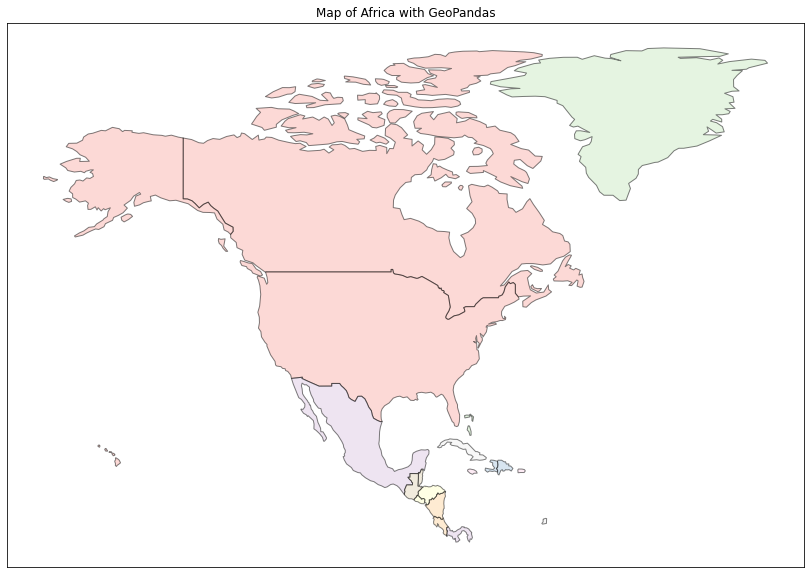

In [99]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# initialize a new figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# grab all African countries
africa = world[world["continent"] == "North America"]

# plot a basic map of Asia
africa.plot(
    ax=ax,
    cmap="Pastel1",
    edgecolor="black",
    alpha=0.5
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Map of Africa with GeoPandas")
plt.show()

In [5]:
table = soup.find('table', 'wikitable')
links = table.findAll('a')

keep = []
for link in links: # Remove all the non titles
    if 'title' in str(link):
        keep.append(link)
links = keep

keep = []
for link in tqdm(links):
    try:
        get_wiki(link)
        keep.append(link)
    except:
        pass
links = keep

# The problem at this point is that it deletes languages.
# Maybe I oculd use some metric of the categories and use ML to find similarties in the vectors...
keep = []
for link in tqdm(links): 
    if any('Languages of' in cat for cat in get_wiki(link).categories) == True:
        keep.append(link)
links = keep

# Everything Past this Point isn't complete

 11%|█▏        | 65/567 [00:26<03:46,  2.22it/s]c:\Users\druid\anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\druid\anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
100%|██████████| 537/537 [02:55<00:00,  3.06it/s]


In [ ]:
# Get the content from the links
links_content = {}
print('Done extracting links. About to fetch: %s links..' % len(links))
for link in links:
    print('Fetching: %s' % link)
    links_content[link.get('title')] = get_wiki_html(link).html()

In [75]:
soup = BeautifulSoup(get_wiki_html(links[0]).html(),'html.parser')
table = soup.find('table', class_='infobox vevent')
table = table.find_all('td')